# Example of a spline estimate for an X and Y plot

To estimate a spline requires that the pandas DataFrame has:
- No missing values in the Y column
- No duplicate rows
- X column is a float or integer
- X column is sorted in increasing order

In [1]:
import numpy as np
import pandas as pd
import datasense as ds
import matplotlib.axes as axes
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [2]:
column_x = 'datetime'
column_y = 'observed'
column_z = 'predicted'
c = cm.Paired.colors

In [3]:
def main():
    data = create_data()
    # If column_x is datetime64[ns], convert to numeric
    data[column_x] = pd.to_numeric(data[column_x])
    spline = ds.cubic_spline(data, column_x, column_y)
    data[column_z] = spline(data[column_x])
    ax = plot_graph(data, column_x, column_y, column_z)
    despine(ax)
    ax.figure.savefig('cubic_spline_numeric.svg', format='svg')
    # Column_x can be converted to datetime64[ns] afterward
    data[column_x] = data[column_x].astype('datetime64[ns]')
    ax = plot_graph(data, column_x, column_y, column_z)
    despine(ax)
    ax.figure.savefig('cubic_spline_datetime.svg', format='svg')

In [4]:
def create_data() -> pd.DataFrame:
    '''
    Create an example pandas DataFrame
    '''
    df = {
        'datetime': ['2019-01-05 05:57:00', '2019-01-06 07:22:00',
                     '2019-01-07 07:52:00', '2019-01-08 08:24:00',
                     '2019-01-09 08:50:00', '2019-01-10 16:53:00',
                     '2019-01-11 17:13:00', '2019-01-12 17:30:00',
                     '2019-01-12 17:30:00', '2019-01-13 04:47:00',
                     '2019-01-14 04:47:00', '2019-01-15 05:53:00',
                     '2019-01-16 06:12:00', '2019-01-17 06:12:00'],
        'observed': [41.99, 42.03, np.nan, 42.05, np.nan, 42.02, 42,
                     41.98, 41.98, np.nan, 41.98, 42, np.nan, 42.05]
    }
    return pd.DataFrame(df).astype({'datetime': 'datetime64[ns]'})

In [5]:
def plot_graph(
    df: pd.DataFrame,
    columnx: str,
    columny: str,
    columnz: str
) -> axes.Axes:
    '''
    Create a scatter plot of column_x and column_y, and overlay with
    the predicted y from the spline.
    '''
    figure_width_height = (8, 6)
    fig = plt.figure(figsize=figure_width_height)
    ax = fig.add_subplot(111)
    ax.plot(df[columnx], df[columny], marker='.', linestyle='', color=c[1])
    ax.plot(df[columnx], df[columnz], marker=None, linestyle='-', color=c[5])
    return ax

In [6]:
def despine(ax: axes.Axes) -> None:
    '''
    Remove the top and right spines of a graph.

    There is only one x axis, on the bottom, and one y axis, on the left.
    '''
    for spine in 'right', 'top':
        ax.spines[spine].set_visible(False)

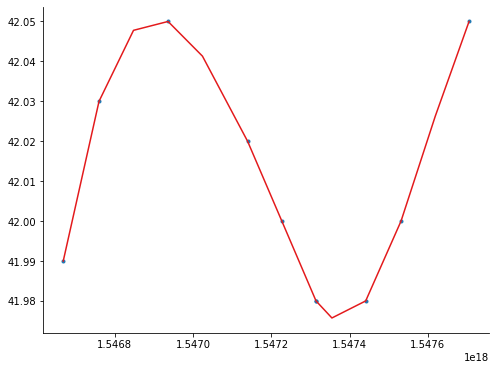

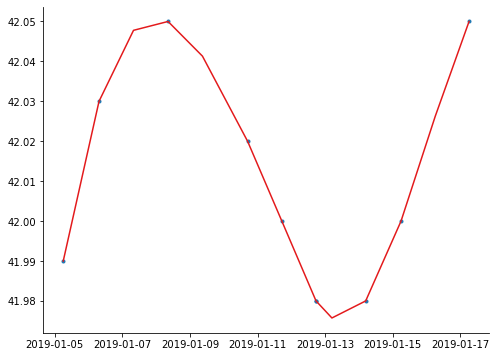

In [7]:
if __name__ == '__main__':
    main()